In [179]:
import numpy as np
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [128]:
fastfood = pd.read_csv('fastfood.csv')
convenience = pd.read_csv('convenience.csv')
market = pd.read_csv('market.csv')
supermarket = pd.read_csv('supermarket.csv')

In [138]:
fastfood.head()

,Unnamed: 0,id,x,y,fastfood_1,fastfood_2,fastfood_3,fastfood_4,fastfood_5,geometry
0,0,30807308,-73.962176,40.792024,463.039001,534.862976,590.109009,615.026001,625.583008,POINT (-73.9621757 40.7920236)
1,1,30807309,-73.962407,40.791687,476.906006,490.960999,571.124023,581.681030,603.976013,POINT (-73.962407 40.7916869)
2,2,30807310,-73.962498,40.791550,473.923004,493.944000,554.085999,564.643005,621.013977,POINT (-73.96249779999999 40.79155)
3,3,30807314,-73.963578,40.790724,416.079987,483.605011,494.161987,611.297974,706.612000,POINT (-73.9635782 40.7907244)
4,4,30807336,-73.964181,40.788475,687.552002,714.736023,755.077026,765.633972,882.770020,POINT (-73.9641811 40.78847529999999)


In [130]:
amenities = [fastfood, convenience, market, supermarket]

In [131]:
fastfood.name = 'fastfood'
convenience.name = 'convenience'
market.name = 'market'
supermarket.name = 'supermarket'

In [143]:
dist = fastfood[['id','x','y','geometry']]

In [156]:
test.iloc[:,3:8]

,supermarket_1,supermarket_2,supermarket_3,supermarket_4,supermarket_5
0,325.010986,699.565002,784.247986,901.033020,902.393982
1,338.877991,655.663025,740.346008,858.492004,889.679016
2,355.915985,638.625000,723.307983,841.453979,872.640991
3,473.269989,580.781982,642.818970,762.224976,783.611023
4,602.379028,615.456970,744.742004,852.254028,869.770996
...,...,...,...,...,...
120804,1170.875000,1301.349976,1542.696045,1601.848999,2368.834961
120805,1018.357971,1148.833008,1390.178955,1449.332031,2216.318115
120806,542.802979,542.802979,821.559021,1138.359985,1231.208008
120807,360.239014,360.239014,477.027008,883.234985,983.676025


In [158]:
for test in amenities:
    s = []
    for i in range(1,6):
        a = test.name + "_" + str(i)
        s.append(a)
    test.columns.values[4:9] = s
    test = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(test.x, test.y), crs={"init": "epsg:4326"})
    test = test.to_crs({"init": "epsg:3857"})
    test['xcol'] = test['geometry'].x
    test['ycol'] = test['geometry'].y
    test = test.drop(columns = ['Unnamed: 0','geometry'])
    test = test.iloc[:,3:8]
    dist = pd.concat([dist, test], axis=1, sort=False)

In [160]:
dist.head()

,id,x,y,geometry,fastfood_1,fastfood_2,fastfood_3,fastfood_4,fastfood_5,convenience_1,...,market_1,market_2,market_3,market_4,market_5,supermarket_1,supermarket_2,supermarket_3,supermarket_4,supermarket_5
0,30807308,-73.962176,40.792024,POINT (-73.9621757 40.7920236),463.039001,534.862976,590.109009,615.026001,625.583008,463.039001,...,2015.677979,4624.346191,4979.435059,5000.0,5000.0,325.010986,699.565002,784.247986,901.033020,902.393982
1,30807309,-73.962407,40.791687,POINT (-73.962407 40.7916869),476.906006,490.960999,571.124023,581.681030,603.976013,476.906006,...,1970.670044,4579.337891,4934.426758,5000.0,5000.0,338.877991,655.663025,740.346008,858.492004,889.679016
2,30807310,-73.962498,40.791550,POINT (-73.96249779999999 40.79155),473.923004,493.944000,554.085999,564.643005,621.013977,493.944000,...,1953.631958,4562.299805,4917.389160,5000.0,5000.0,355.915985,638.625000,723.307983,841.453979,872.640991
3,30807314,-73.963578,40.790724,POINT (-73.9635782 40.7907244),416.079987,483.605011,494.161987,611.297974,706.612000,483.605011,...,1832.334961,4441.002930,4796.091797,5000.0,5000.0,473.269989,580.781982,642.818970,762.224976,783.611023
4,30807336,-73.964181,40.788475,POINT (-73.9641811 40.78847529999999),687.552002,714.736023,755.077026,765.633972,882.770020,668.963989,...,1632.854980,4211.426758,4571.346191,5000.0,5000.0,602.379028,615.456970,744.742004,852.254028,869.770996


In [162]:
type(dist)

pandas.core.frame.DataFrame

In [80]:
distance = gpd.GeoDataFrame()
for test in amenities:
    test['amenity'] = test.name
    test = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(test.x, test.y), crs={"init": "epsg:3857"})
    test = test.drop(columns = ['Unnamed: 0'])
    test = test.melt(id_vars=['id','x','y','amenity','geometry'])
    distance = distance.append(test)

In [86]:
distance.head()

,id,x,y,amenity,geometry,nth_node,value
0,30807308,-73.962176,40.792024,fastfood,POINT (-73.9621757 40.7920236),1,463.039001
1,30807309,-73.962407,40.791687,fastfood,POINT (-73.962407 40.7916869),1,476.906006
2,30807310,-73.962498,40.791550,fastfood,POINT (-73.96249779999999 40.79155),1,473.923004
3,30807314,-73.963578,40.790724,fastfood,POINT (-73.9635782 40.7907244),1,416.079987
4,30807336,-73.964181,40.788475,fastfood,POINT (-73.9641811 40.78847529999999),1,687.552002


In [85]:
c = distance.columns.values
c[-2] = "nth_node"
distance.columns = c

In [82]:
len(distance)

2416180

In [83]:
type(distance)

geopandas.geodataframe.GeoDataFrame

In [165]:
distance.to_csv(path_or_buf = "distance.csv")

In [164]:
dist.to_csv(path_or_buf = "dist.csv")

In [89]:
distance.to_file("distance.geojson", driver='GeoJSON')

In [166]:
import altair as alt

<class 'pandas.core.frame.DataFrame'>


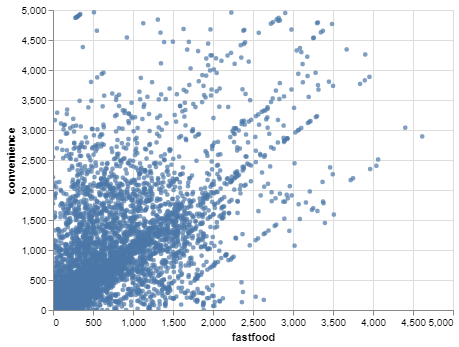

In [187]:
# Trim to 5000 to avoid memory issues on Binder
dist_trim = dist[(dist['fastfood_1']<5000) & (dist['convenience_1']<5000)]
N = 5000
dist_trim = dist_trim.sample(N)
dist_trim = dist_trim.drop(columns=['geometry'])
print(type(dist_trim))

# Configure the points
alt.Chart(dist_trim).mark_circle(size=20).encode(
    x=alt.X('fastfood_1:Q',title = 'fastfood'),
    y=alt.Y('convenience_1:Q',title = 'convenience'),
    #color='Origin',
    tooltip=['x', 'y', 'fastfood_1', 'convenience_1']
).interactive()